# 1. Preparation of Data and Metadata

## 1.1 Feature Index Mapping

This task involves parsing a CSV file named "idx_to_feature_name.csv" to pair feature names with their corresponding index ranges within a numpy array. \
\
The output format of `feature_name_idx_dict` is **{"feature_name": (idx_start, idx_stop), ...}** \
\
Providing a clear association between features and their positions in the array. This facilitates efficient data manipulation and analysis by enabling precise referencing and extraction of specific features from the array.

In [1]:
# import dependencies
import csv

In [2]:
IDX_TO_FEATURE_NAME_FILE = "Files\metadata\idx_to_feature_name.csv"

In [3]:
def create_feature_name_idx_dict(csv_file):
    feature_name_idx_dict = {}
    with open(csv_file, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            index = int(row[0])
            feature_name_parts = row[1].split('_')
            feature_name = '_'.join(feature_name_parts[:-1]).lower()  # Extract feature name without the number suffix and convert to lowercase
            if feature_name not in feature_name_idx_dict:
                feature_name_idx_dict[feature_name] = (index, index)
            else:
                start_idx, _ = feature_name_idx_dict[feature_name]
                feature_name_idx_dict[feature_name] = (start_idx, index)
    return feature_name_idx_dict

def get_size_of_feature(feature_name_idx_dict, feature_name):
    return feature_name_idx_dict[feature_name][1] - feature_name_idx_dict[feature_name][0] + 1

def get_feature_indices(feature_name_idx_dict, feature_name):
    lower_feature_name = feature_name.lower()
    for key in feature_name_idx_dict.keys():
        if lower_feature_name == key.lower():
            return feature_name_idx_dict[key], ""
    return (), f"Error: {feature_name} not found in the indices dictionary."

# Example usage
feature_name = "contrast"

feature_name_idx_dict = create_feature_name_idx_dict(IDX_TO_FEATURE_NAME_FILE)
print(f"The dict looks like:\n{feature_name_idx_dict}")
print("")

indices, error_message = get_feature_indices(feature_name_idx_dict, feature_name)
if indices:
    print(f"The size of feature '{feature_name}' is {get_size_of_feature(feature_name_idx_dict, feature_name)}. \
          \nThis means, in the audio dataset (numpy array) 'contrast' has {get_size_of_feature(feature_name_idx_dict, feature_name)} feature rows.")
    print(f"The indices for '{feature_name}' are: {indices}.")
else:
    print(error_message)

The dict looks like:
{'bandwidth': (0, 0), 'centroid': (1, 1), 'contrast': (2, 8), 'energy': (9, 9), 'flatness': (10, 10), 'flux': (11, 11), 'melspect': (12, 75), 'mfcc': (76, 107), 'mfcc_d': (108, 139), 'mfcc_d2': (140, 171), 'power': (172, 172), 'yin': (173, 173), 'zcr': (174, 174)}

The size of feature 'contrast' is 7.           
This means, in the audio dataset (numpy array) 'contrast' has 7 feature rows.
The indices for 'contrast' are: (2, 8).


In [4]:
def print_feature_names(dictionary):
    print("The feature names are:")
    print("")
    for key, value in dictionary.items():
        print(f"{key}")

print_feature_names(feature_name_idx_dict)

The feature names are:

bandwidth
centroid
contrast
energy
flatness
flux
melspect
mfcc
mfcc_d
mfcc_d2
power
yin
zcr


## 1.2 Class-wise Sample ID Dictionary Creation

Given the input file "development.csv" containing class labels as strings and sample IDs, the task aims to produce a dictionary where each class label corresponds to a list of sample IDs belonging to that class. For instance, "Alarm" would map to a list of sample IDs such as [1, 6, 8, 9, ...]. This output format organizes the data for easy reference and analysis based on class membership.

In [5]:
import csv

In [6]:
DEVELOPMENT_FILE = "Files\metadata\development.csv"

In [7]:
def replace_special_characters(word):
    # Replace special characters with ASCII equivalents
    word = word.replace('ö', 'oe').replace('ä', 'ae').replace('ü', 'ue').replace('ß', 'ss')
    return word

def create_class_to_idx_list_dict(csv_file):
    class_to_idx_list_dict = {}
    with open(csv_file, newline='', encoding='utf-8') as csvfile:  # Specify UTF-8 encoding
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            word = row['word']
            file_index = int(row['id'])
            filename_parts = row['filename'].split('/')
            filename = '/'.join(filename_parts[-2:])
            class_to_idx_list_dict.setdefault(word, []).append((file_index, filename))
    return class_to_idx_list_dict

# Example usage:
class_to_idx_list_dict = create_class_to_idx_list_dict(DEVELOPMENT_FILE)
# Print the dictionary
for my_class, ids in class_to_idx_list_dict.items():
    print(f"{my_class}: [{str(ids[:2])[1:-1] + ', ...'}]")

Brötchen: [(0, 'Brötchen/1.wav'), (13, 'Brötchen/2.wav'), ...]
kann: [(1, 'kann/1.wav'), (15, 'kann/2.wav'), ...]
Staubsauger: [(2, 'Staubsauger/1.wav'), (16, 'Staubsauger/2.wav'), ...]
Spiegel: [(3, 'Spiegel/1.wav'), (12, 'Spiegel/2.wav'), ...]
Alarm: [(4, 'Alarm/1.wav'), (45, 'Alarm/2.wav'), ...]
Lüftung: [(5, 'Lüftung/1.wav'), (19, 'Lüftung/2.wav'), ...]
Ofen: [(6, 'Ofen/1.wav'), (10, 'Ofen/2.wav'), ...]
Haus: [(7, 'Haus/1.wav'), (21, 'Haus/2.wav'), ...]
Heizung: [(8, 'Heizung/1.wav'), (30, 'Heizung/2.wav'), ...]
Fernseher: [(9, 'Fernseher/1.wav'), (47, 'Fernseher/2.wav'), ...]
Schraube: [(11, 'Schraube/1.wav'), (24, 'Schraube/2.wav'), ...]
Licht: [(14, 'Licht/1.wav'), (41, 'Licht/2.wav'), ...]
aus: [(20, 'aus/1.wav'), (31, 'aus/2.wav'), ...]
nicht: [(22, 'nicht/1.wav'), (29, 'nicht/2.wav'), ...]
warm: [(23, 'warm/1.wav'), (28, 'warm/2.wav'), ...]
an: [(32, 'an/1.wav'), (73, 'an/2.wav'), ...]
Leitung: [(34, 'Leitung/1.wav'), (43, 'Leitung/2.wav'), ...]
offen: [(35, 'offen/1.wav'), (

In [8]:
def get_file_name_with_list_idx(class_to_idx_list_dict, key, i):
    return class_to_idx_list_dict[key][i][1]

# Example usage
key = "Alarm"
idx = 1
print(f"The file of class '{key}' and index '{idx}' is {get_file_name_with_list_idx(class_to_idx_list_dict, key, idx)}")

The file of class 'Alarm' and index '1' is Alarm/2.wav


In [9]:
def search_class_and_output_list(word, class_to_idx_list_dict):
    # word = replace_special_characters(word)
    for key in class_to_idx_list_dict.keys():
        if word == key:
            return class_to_idx_list_dict[word], ""
    return [], f"Error: \"{word}\" not found in the indices dictionary."

# Example usage:
search_word = "Brötchen"
elements = 3

idx_list, error_message = search_class_and_output_list(search_word, class_to_idx_list_dict)
if idx_list:
    display_list = idx_list[:elements] + ['...']
    print(f"The {elements} first samples in the list for '{search_word}' are: \n{display_list}")
else:
    print(error_message)

The 3 first samples in the list for 'Brötchen' are: 
[(0, 'Brötchen/1.wav'), (13, 'Brötchen/2.wav'), (18, 'Brötchen/3.wav'), '...']


In [10]:
def print_class_lengths(dictionary):
    print("The size of the different samples of each class is:")
    print("")
    for class_label, sample_ids in dictionary.items():
        print(f"{class_label}: {len(sample_ids)}")

print_class_lengths(class_to_idx_list_dict)

The size of the different samples of each class is:

Brötchen: 2038
kann: 2038
Staubsauger: 2038
Spiegel: 2040
Alarm: 2042
Lüftung: 2045
Ofen: 2044
Haus: 2042
Heizung: 2036
Fernseher: 2046
Schraube: 2046
Licht: 2044
aus: 2041
nicht: 2045
warm: 2040
an: 2041
Leitung: 2045
offen: 2039
wunderbar: 2042
Radio: 2042
other: 4462


In [11]:
def word_exists_in_dict(word, dictionary):
    return word in dictionary

# Example usage:
word = "other"
print(f"Class '{word}' exist: {word_exists_in_dict(word, class_to_idx_list_dict)}")

Class 'other' exist: True


## 1.3 Load WAV Files
This task involves traversing a directory structure with multiple classes, each containing corresponding filenames. The output is a dictionary where each class label maps to a list of filepaths belonging to that class. This organized structure facilitates easy retrieval and manipulation of files based on their class membership.

In [12]:
import os
from glob import glob

In [13]:
WAV_DIR = "Files/MLPC24_speech_commands_raw_waveforms"

In [14]:
def count_files_in_directory(directory):
    file_list = glob(f"{directory}/**", recursive=True)
    file_count = sum(1 for f in file_list if not os.path.isdir(f))
    return file_count

# Example usage:
total_files = count_files_in_directory(WAV_DIR)
print(f"Total number of files in directory '{WAV_DIR}': {total_files}")

Total number of files in directory 'Files/MLPC24_speech_commands_raw_waveforms': 45296


In [15]:
def check_validity_files_and_development_csv(class_to_idx_list_dict, dir_name_wav_files):
    audio_files = glob(os.path.join(dir_name_wav_files, "*", "*.wav"))
    class_to_wav_filepath_dict = {}
    for file in audio_files:
        annotated_class = os.path.basename(os.path.dirname(file)).replace("\\", "/")
        class_to_wav_filepath_dict.setdefault(annotated_class, []).append(file.replace("\\", "/"))

    counter = 0
    for class_name, sample_ids in class_to_idx_list_dict.items():
        wav_files = class_to_wav_filepath_dict[class_name]
        for idx, filepath in sample_ids:
            filepath = os.path.join(dir_name_wav_files, filepath).replace("\\", "/")
            if filepath not in wav_files:
                print(f"Error: {filepath}, Check Files and Development.csv!!!")
            else:
                counter += 1
    print(f"All Filenames ({counter}) have corresponding filename in CSV File!")

check_validity_files_and_development_csv(class_to_idx_list_dict, WAV_DIR)

All Filenames (45296) have corresponding filename in CSV File!


In [16]:
# Get the id with filename
def get_numpy_id_with_filename(class_to_idx_list_dict, class_name, idx):
    searched_filepath = os.path.join(class_name, f"{idx}.wav").replace("\\", "/")
    for samples in class_to_idx_list_dict[class_name]:
        idx, filepath = samples
        if searched_filepath == filepath:
            return idx 
    print("No filepath with this idx found!")

# Example usage
sample_word = "Alarm"
idx = 1
print(f"The list idx {idx} of {sample_word} corresponds to numpy data {get_numpy_id_with_filename(class_to_idx_list_dict, sample_word, idx)}")

The list idx 1 of Alarm corresponds to numpy data 4


In [17]:
def extract_dir_and_wavname(filepath):
    # Split the filepath into directory and filename using os.path.split()
    directory, filename = os.path.split(filepath)
    
    # Get the class label and ID from the filename
    class_label = os.path.basename(directory)
    #id_, _ = os.path.splitext(filename)  # Extract ID without the extension
    
    return (directory, filename)

def extract_last_2_parts_of_filepath(filepath):
    # Split the filepath into directory and filename using os.path.split()
    directory, filename = os.path.split(filepath)
    
    # Get the class label and ID from the filename
    class_label = os.path.basename(directory)
    
    return os.path.join(class_label,filename).replace("\\", "/")  

### !!! Raw join, not always correct
def construct_wav_file_path(directory, class_name, idx):
    # Join the directory and filename using os.path.join()
    full_file_path = os.path.join(directory, class_name, f"{idx}.wav").replace("\\", "/")
    return full_file_path
###

def join_dir_name_and_file_name(directory, file):
    # Join the directory and filename using os.path.join()
    full_file_path = str(os.path.join(directory, file).replace("\\", "/"))
    return full_file_path

# Example usage:
filepath = "Files/MLPC24_speech_commands_raw_waveforms/Alarm/1.wav"
dir, wavname = extract_dir_and_wavname(filepath)
print(f"Class label: ({dir}, {wavname})")
filepath = "Files/MLPC24_speech_commands_raw_waveforms/other/100_10_speech_false.wav"
dir, wavname = extract_dir_and_wavname(filepath)
print(f"Class label: ({dir}, {wavname})")

# Example usage:
filepath = "Files/MLPC24_speech_commands_raw_waveforms/Alarm/1.wav"
extracted_path = extract_last_2_parts_of_filepath(filepath)
print(f"Extracted Path: {extracted_path}")

# Example usage:
full_path = construct_wav_file_path(WAV_DIR, "Alarm", "1")
print(f"The path is: {full_path}")

# Example usage:
full_path = join_dir_name_and_file_name(WAV_DIR, "Alarm/1.wav")
print(f"The path is: {full_path}")

Class label: (Files/MLPC24_speech_commands_raw_waveforms/Alarm, 1.wav)
Class label: (Files/MLPC24_speech_commands_raw_waveforms/other, 100_10_speech_false.wav)
Extracted Path: Alarm/1.wav
The path is: Files/MLPC24_speech_commands_raw_waveforms/Alarm/1.wav
The path is: Files/MLPC24_speech_commands_raw_waveforms/Alarm/1.wav


### 1.3.2 Numpy dataset

This task entails associating numpy data with their respective class names or IDs. It involves linking each data sample in the numpy array with its corresponding class label or identifier. By creating this association, the dataset becomes organized, allowing for easy access and analysis of data samples based on their class membership.

In [18]:
import numpy as np

In [19]:
DATASET_DIR = "Files/development_numpy/development.npy"

In [20]:
dataset_audio = np.load(DATASET_DIR)

# Output the size information
print(f"The dataset contains {dataset_audio.shape[0]} different samples, each divided into {dataset_audio.shape[1]} features and {dataset_audio.shape[2]} timestamps.")
print("\nThis means:")
print(f"- Samples: {dataset_audio.shape[0]}")
print(f"- Features per sample: {dataset_audio.shape[1]}")
print(f"- Timeframes per sample: {dataset_audio.shape[2]}")
print(f"\nShape of the dataset: {dataset_audio.shape}")

The dataset contains 45296 different samples, each divided into 175 features and 44 timestamps.

This means:
- Samples: 45296
- Features per sample: 175
- Timeframes per sample: 44

Shape of the dataset: (45296, 175, 44)


In [21]:
def get_numpy_array_id_with_wavfile(csv_file, filename, dataset_audio):
    searched_filename = extract_last_2_parts_of_filepath(filename)
    with open(csv_file, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            extracted_row = extract_last_2_parts_of_filepath(row[1])
            if extracted_row == searched_filename:
                return row[0], dataset_audio[int(row[0])]
    return None


# Example usage:
my_filename = "Files/MLPC24_speech_commands_raw_waveforms/Alarm/870.wav"

data = get_numpy_array_id_with_wavfile(DEVELOPMENT_FILE, my_filename, dataset_audio)
print(f"Output: {data}")

Output: ('11475', array([[2.00648000e+03, 2.12015482e+03, 2.08029502e+03, ...,
        1.61402481e+03, 2.04287509e+03, 1.76507688e+03],
       [7.87565777e+02, 9.03466461e+02, 9.79281595e+02, ...,
        5.18891405e+02, 8.96712357e+02, 6.05834256e+02],
       [4.28290766e+00, 7.05172623e+00, 3.72060986e+00, ...,
        1.08194020e+01, 7.92294884e+00, 8.45455184e+00],
       ...,
       [1.70451701e-01, 1.89675540e-01, 8.31865072e-02, ...,
        1.23929107e+00, 1.42265171e-01, 5.94947100e-01],
       [8.00000000e+03, 8.00000000e+03, 1.43224514e+02, ...,
        8.00000000e+03, 8.00000000e+03, 8.00000000e+03],
       [5.00000000e-02, 1.75000000e-02, 2.50000000e-02, ...,
        2.50000000e-03, 3.00000000e-02, 2.50000000e-02]]))


In [22]:
def get_numpy_array_with_wav_id(data_dict, dataset_audio, key ,id_):
    if key in data_dict:
        return key, get_numpy_id_with_filename(class_to_idx_list_dict, key, id_), dataset_audio[id_]
    else: 
        print(f"Error: Key '{key}' not found in the indices dictionary.")
    
    return None

# Example usage:
my_sample_class = "Alarm"
my_sample_list_id = 1

data = get_numpy_array_with_wav_id(class_to_idx_list_dict, dataset_audio, my_sample_class, my_sample_list_id)
if data is not None:
    key, id_, numpy_array = data
    print(f"Output numpy array with tuple of shape: ('{key}', Numpy ID '{id_}', Raw data with shape {numpy_array.shape})")
else:
    print("Failed to retrieve numpy array.")

Output numpy array with tuple of shape: ('Alarm', Numpy ID '4', Raw data with shape (175, 44))


In [23]:
def get_wav_filepath_from_numpy_array_id(csv_file, id_):
    with open(csv_file, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            if row[0] == str(id_):
                # Split the filepath into directory and filename using os.path.split()
                directory, filename = os.path.split(row[1])
                _, dir_name = os.path.split(directory)
                # Join the last two parts
                joined_parts = os.path.join(dir_name, filename).replace("\\", "/")

                return joined_parts, row[3]
    return None


# Example usage:
my_sample_numpy_id = 10
data = get_wav_filepath_from_numpy_array_id(DEVELOPMENT_FILE, my_sample_numpy_id)
print(f"Output filepath: {data}")

Output filepath: ('Ofen/2.wav', 'Ofen')


# 2. Make a simple example with torchaudio to understand the numpy array data better

In [24]:
import IPython
import IPython.display as ipd
import torch
import torchaudio
import matplotlib.pyplot as plt
import random

## 2.1 Play samples to test the audio dataset

In [25]:
# RANDOM
# random.seed(42)
my_test_key = "Alarm"
my_test_sample = random.randint(0, len(class_to_idx_list_dict[my_test_key]))

print(f"Play some random audio file of key {my_test_key}...")
print("")

# play audio file
audio_file = construct_wav_file_path(WAV_DIR, my_test_key, my_test_sample)
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

Play some random audio file of key Alarm...

Files/MLPC24_speech_commands_raw_waveforms/Alarm/601.wav


In [26]:
# NOT RANDOM, you can choose and it stays the same
my_test_key = "Alarm"
my_test_sample = 100

print(f"The max len to choose is: {len(class_to_idx_list_dict[my_test_key])}")

print(f"Play some random audio file of key {my_test_key}...")
print("")

# play audio file
audio_file = construct_wav_file_path(WAV_DIR, my_test_key, my_test_sample)
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

The max len to choose is: 2042
Play some random audio file of key Alarm...

Files/MLPC24_speech_commands_raw_waveforms/Alarm/100.wav


## 2.2 Now we want to combine torchaudio and numpy dataset and compare

In [27]:
my_test_key = "Alarm"
# my_test_sample = 900
my_test_sample = "Alarm/1.wav"

# play audio file
# audio_file = construct_wav_file_path(WAV_DIR, my_test_key, my_test_sample)
audio_file = join_dir_name_and_file_name(WAV_DIR, my_test_sample)
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

# load wav data into torchaudio
waveform, sample_rate = torchaudio.load(audio_file)

Files/MLPC24_speech_commands_raw_waveforms/Alarm/1.wav


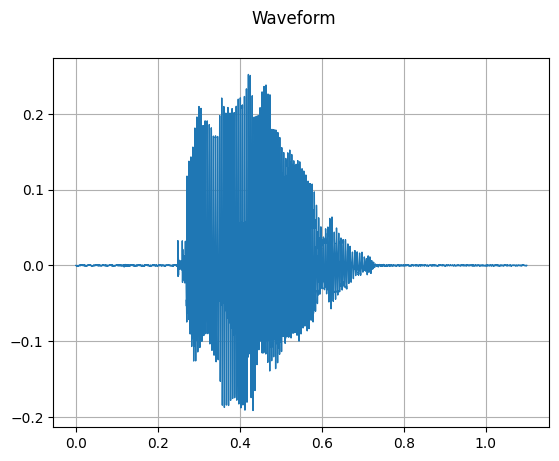

In [28]:
# from torchaudio
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("Waveform")
    
plot_waveform(waveform, sample_rate)

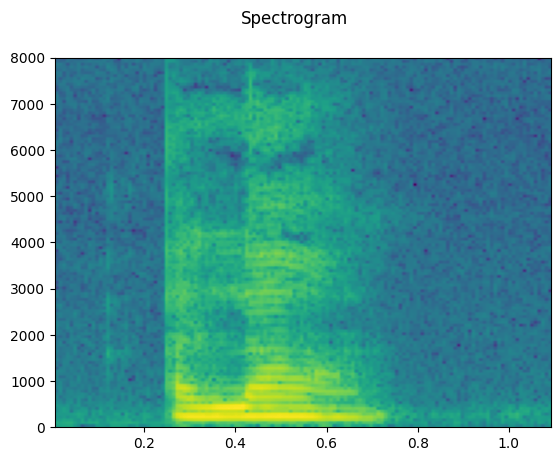

In [29]:
# from torchaudio
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

plot_specgram(waveform, sample_rate)

Files/MLPC24_speech_commands_raw_waveforms/Alarm/100.wav


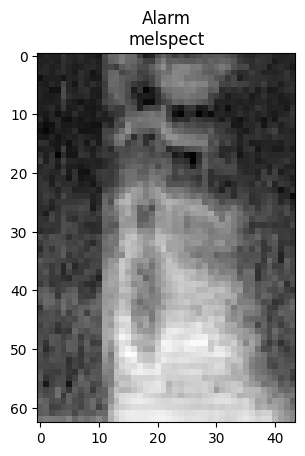

In [30]:
# plot a 2D image (here melspect)
my_feature = "melspect"
my_test_key = "Alarm"
my_test_sample = 100

filename = construct_wav_file_path(WAV_DIR, my_test_key, my_test_sample)
print(filename)
data = get_numpy_array_id_with_wavfile(DEVELOPMENT_FILE, filename, dataset_audio)

(start_idx, stop_idx), _ = get_feature_indices(feature_name_idx_dict, my_feature)

plt.title(f"{my_test_key}\n{my_feature}")
if get_size_of_feature(feature_name_idx_dict, my_feature) > 1:
    plt.imshow(np.flipud(data[1][start_idx:stop_idx,:]), cmap="gray")
else:
    plt.plot(data[1][start_idx])

Spectograms looks similar! Means the "data understanding" is okay, there are no errors / misinterpretation of the numpy feature array! Thats good... :-)

## 2.3 Plot waveform matrix of wav file (altougth we do not take these features...)

In [31]:
def plot_waveform_matrix(audios):

    num_examples = len(audios)
    
    num_channels = audios[list(audios.keys())[0]][1].shape[0]  # Assuming all waveforms have the same number of channels

    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    
    for i, (k, v) in enumerate(audios.items()):
        filename, waveform, sample_rate = v
        
        row = i // 4
        col = i % 4

        waveform = waveform.numpy()
        num_frames = waveform.shape[1]
        time_axis = torch.arange(0, num_frames) / sample_rate

        for c in range(num_channels):
            axes[row, col].plot(time_axis, waveform[c], linewidth=1)
            axes[row, col].grid(True)
            axes[row, col].set_title(f"{os.path.basename(os.path.dirname(filename))}\nFile: {os.path.basename(filename)}")
            if num_channels > 1:
                axes[row, col].set_ylabel(f"Channel {c+1}")

    fig.suptitle("Waveforms")
    plt.tight_layout()

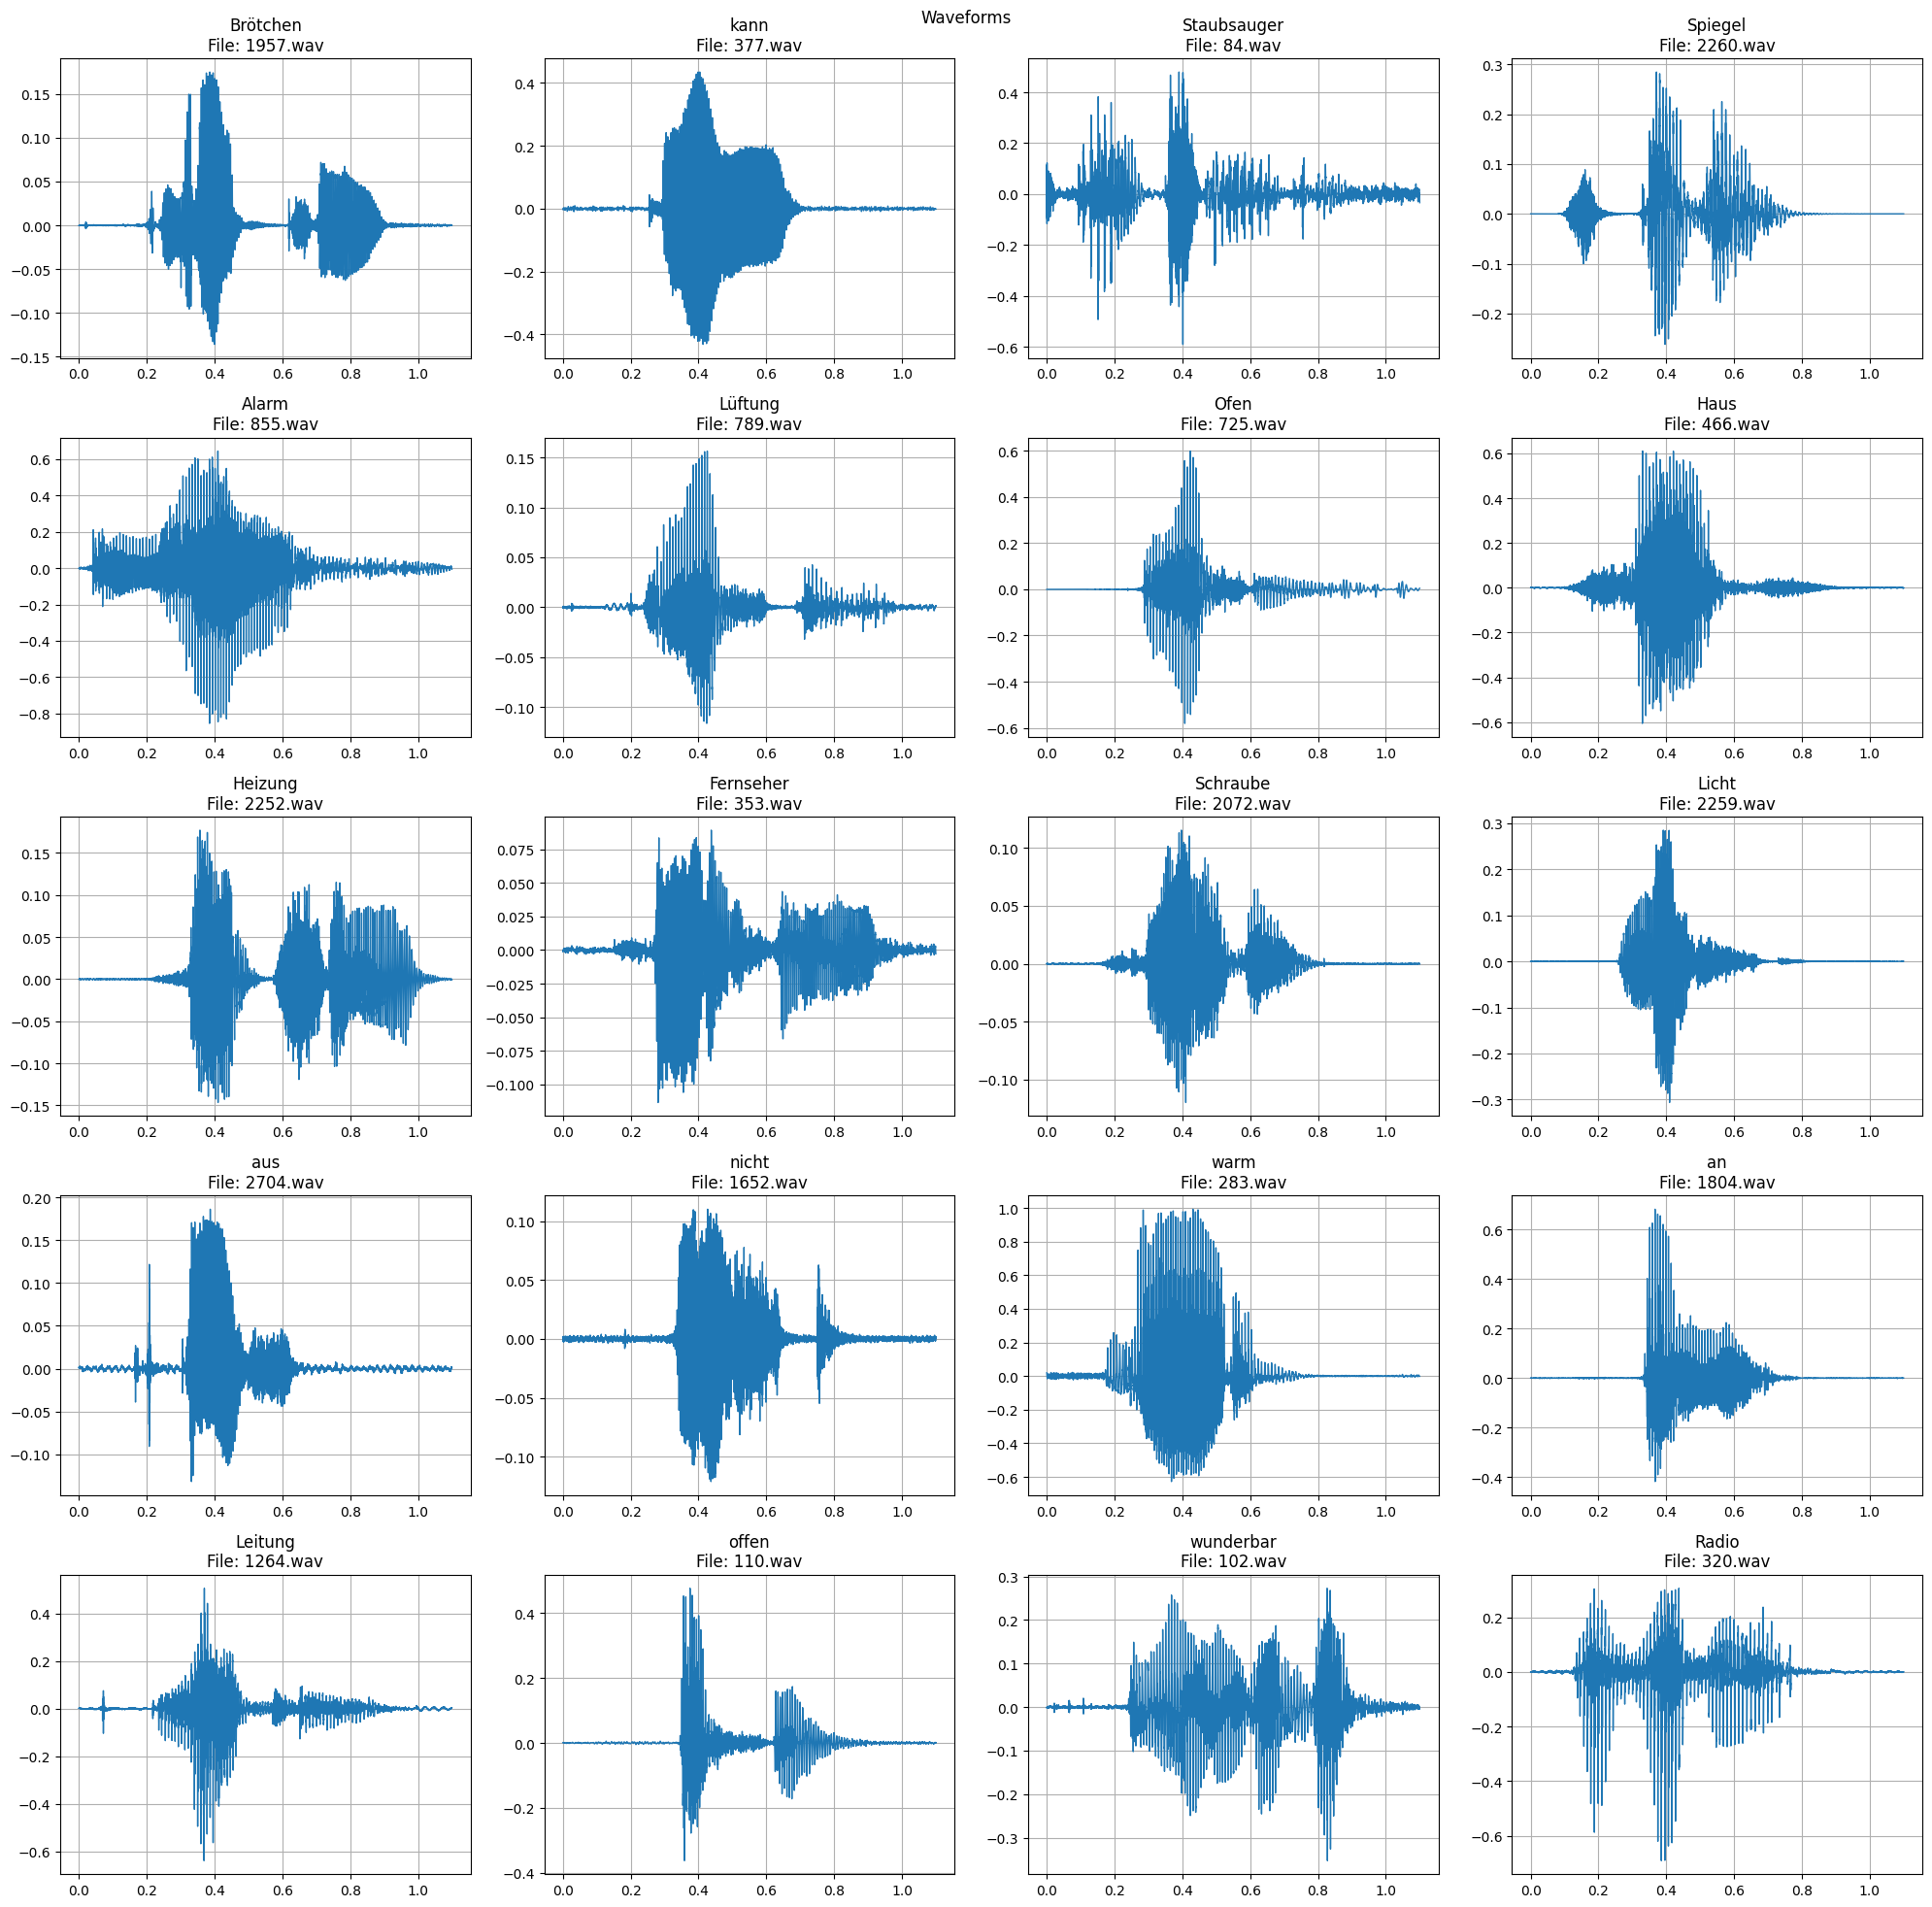

In [32]:
# RANDOM
random.seed(42)

audios = {}
for k, v in class_to_idx_list_dict.items():
    random_sample = random.randint(0, len(v))
    filename = v[random_sample]
    filename = join_dir_name_and_file_name(WAV_DIR, filename[1])
    # print(filename)
    waveform, sample_rate = torchaudio.load(filename)
    audios[k] = (filename, waveform, sample_rate)

del audios["other"]

plot_waveform_matrix(audios)

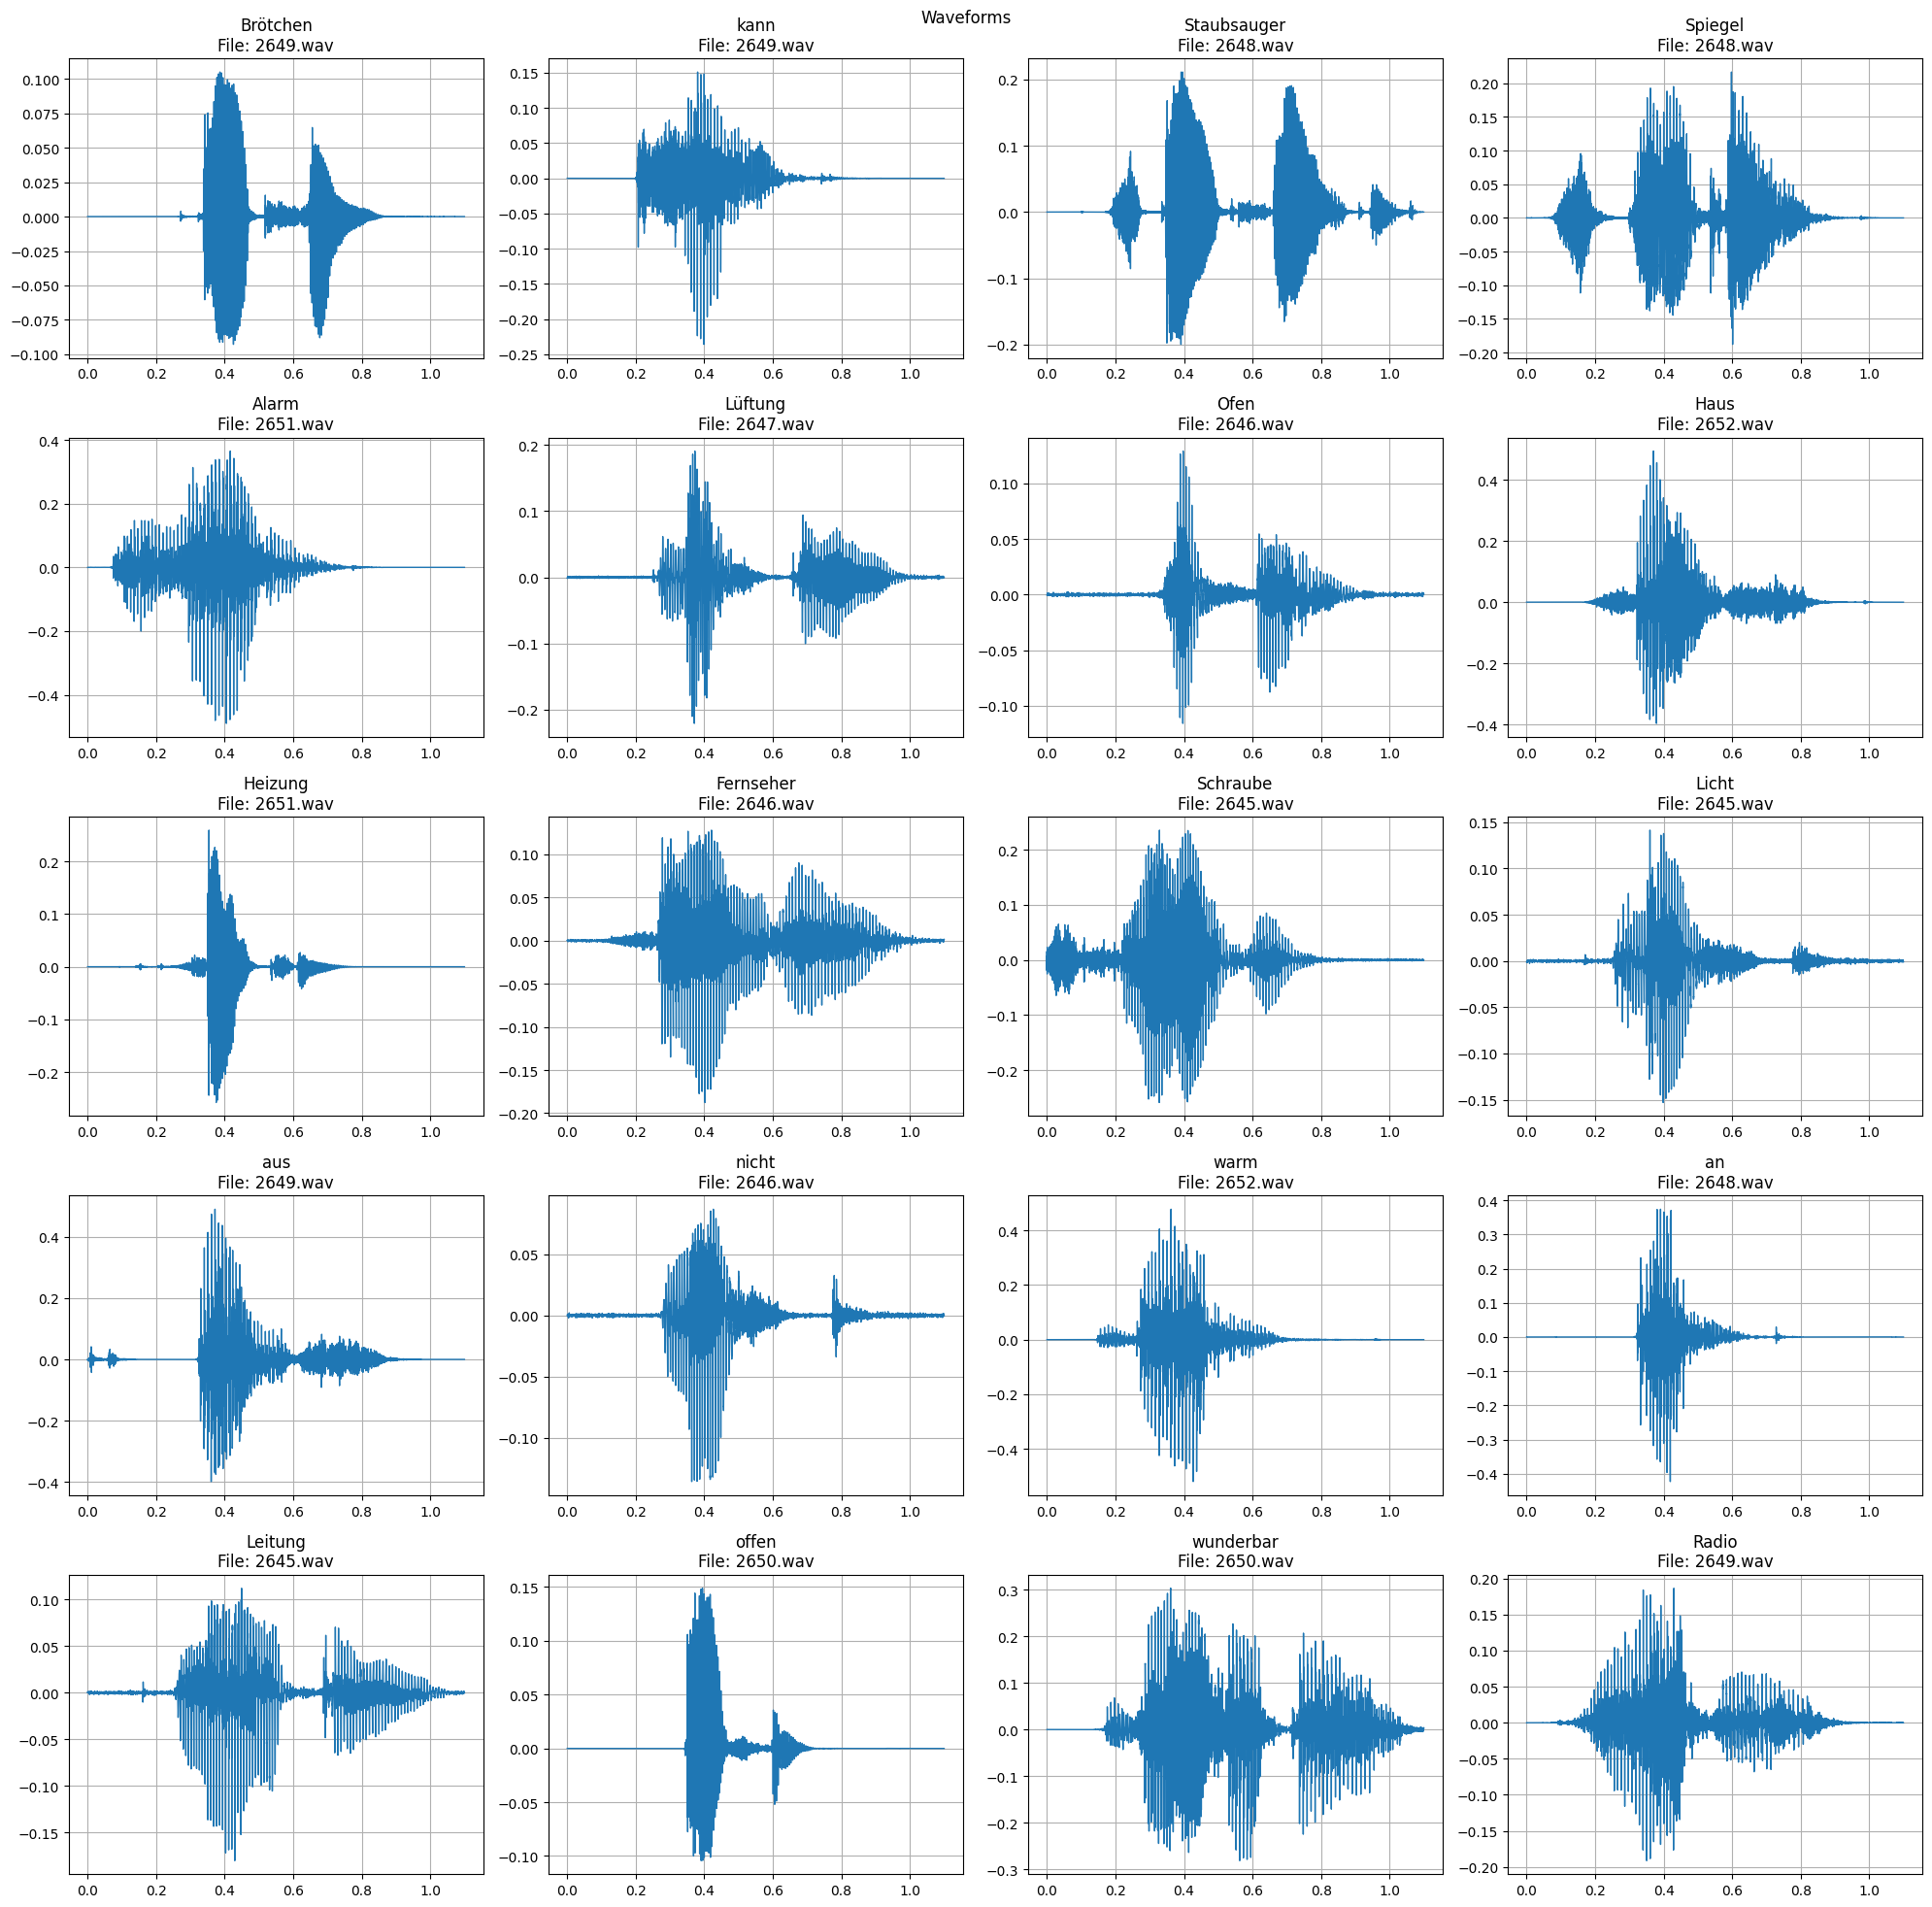

In [33]:
# NOT RANDOM
pos = 500

audios = {}
for k, v in class_to_idx_list_dict.items():
    filename = v[pos]
    
    filename = v[random_sample]
    filename = join_dir_name_and_file_name(WAV_DIR, filename[1])
    # print(filename)
    waveform, sample_rate = torchaudio.load(filename)
    audios[k] = (filename, waveform, sample_rate)

del audios["other"]

plot_waveform_matrix(audios)

## 2.4 Now we want to compare samples from same class

In [34]:
# just for copying the key you need...
for annotated_class, files in class_to_idx_list_dict.items():
    print(f"{annotated_class}", end = "    ")

Brötchen    kann    Staubsauger    Spiegel    Alarm    Lüftung    Ofen    Haus    Heizung    Fernseher    Schraube    Licht    aus    nicht    warm    an    Leitung    offen    wunderbar    Radio    other    

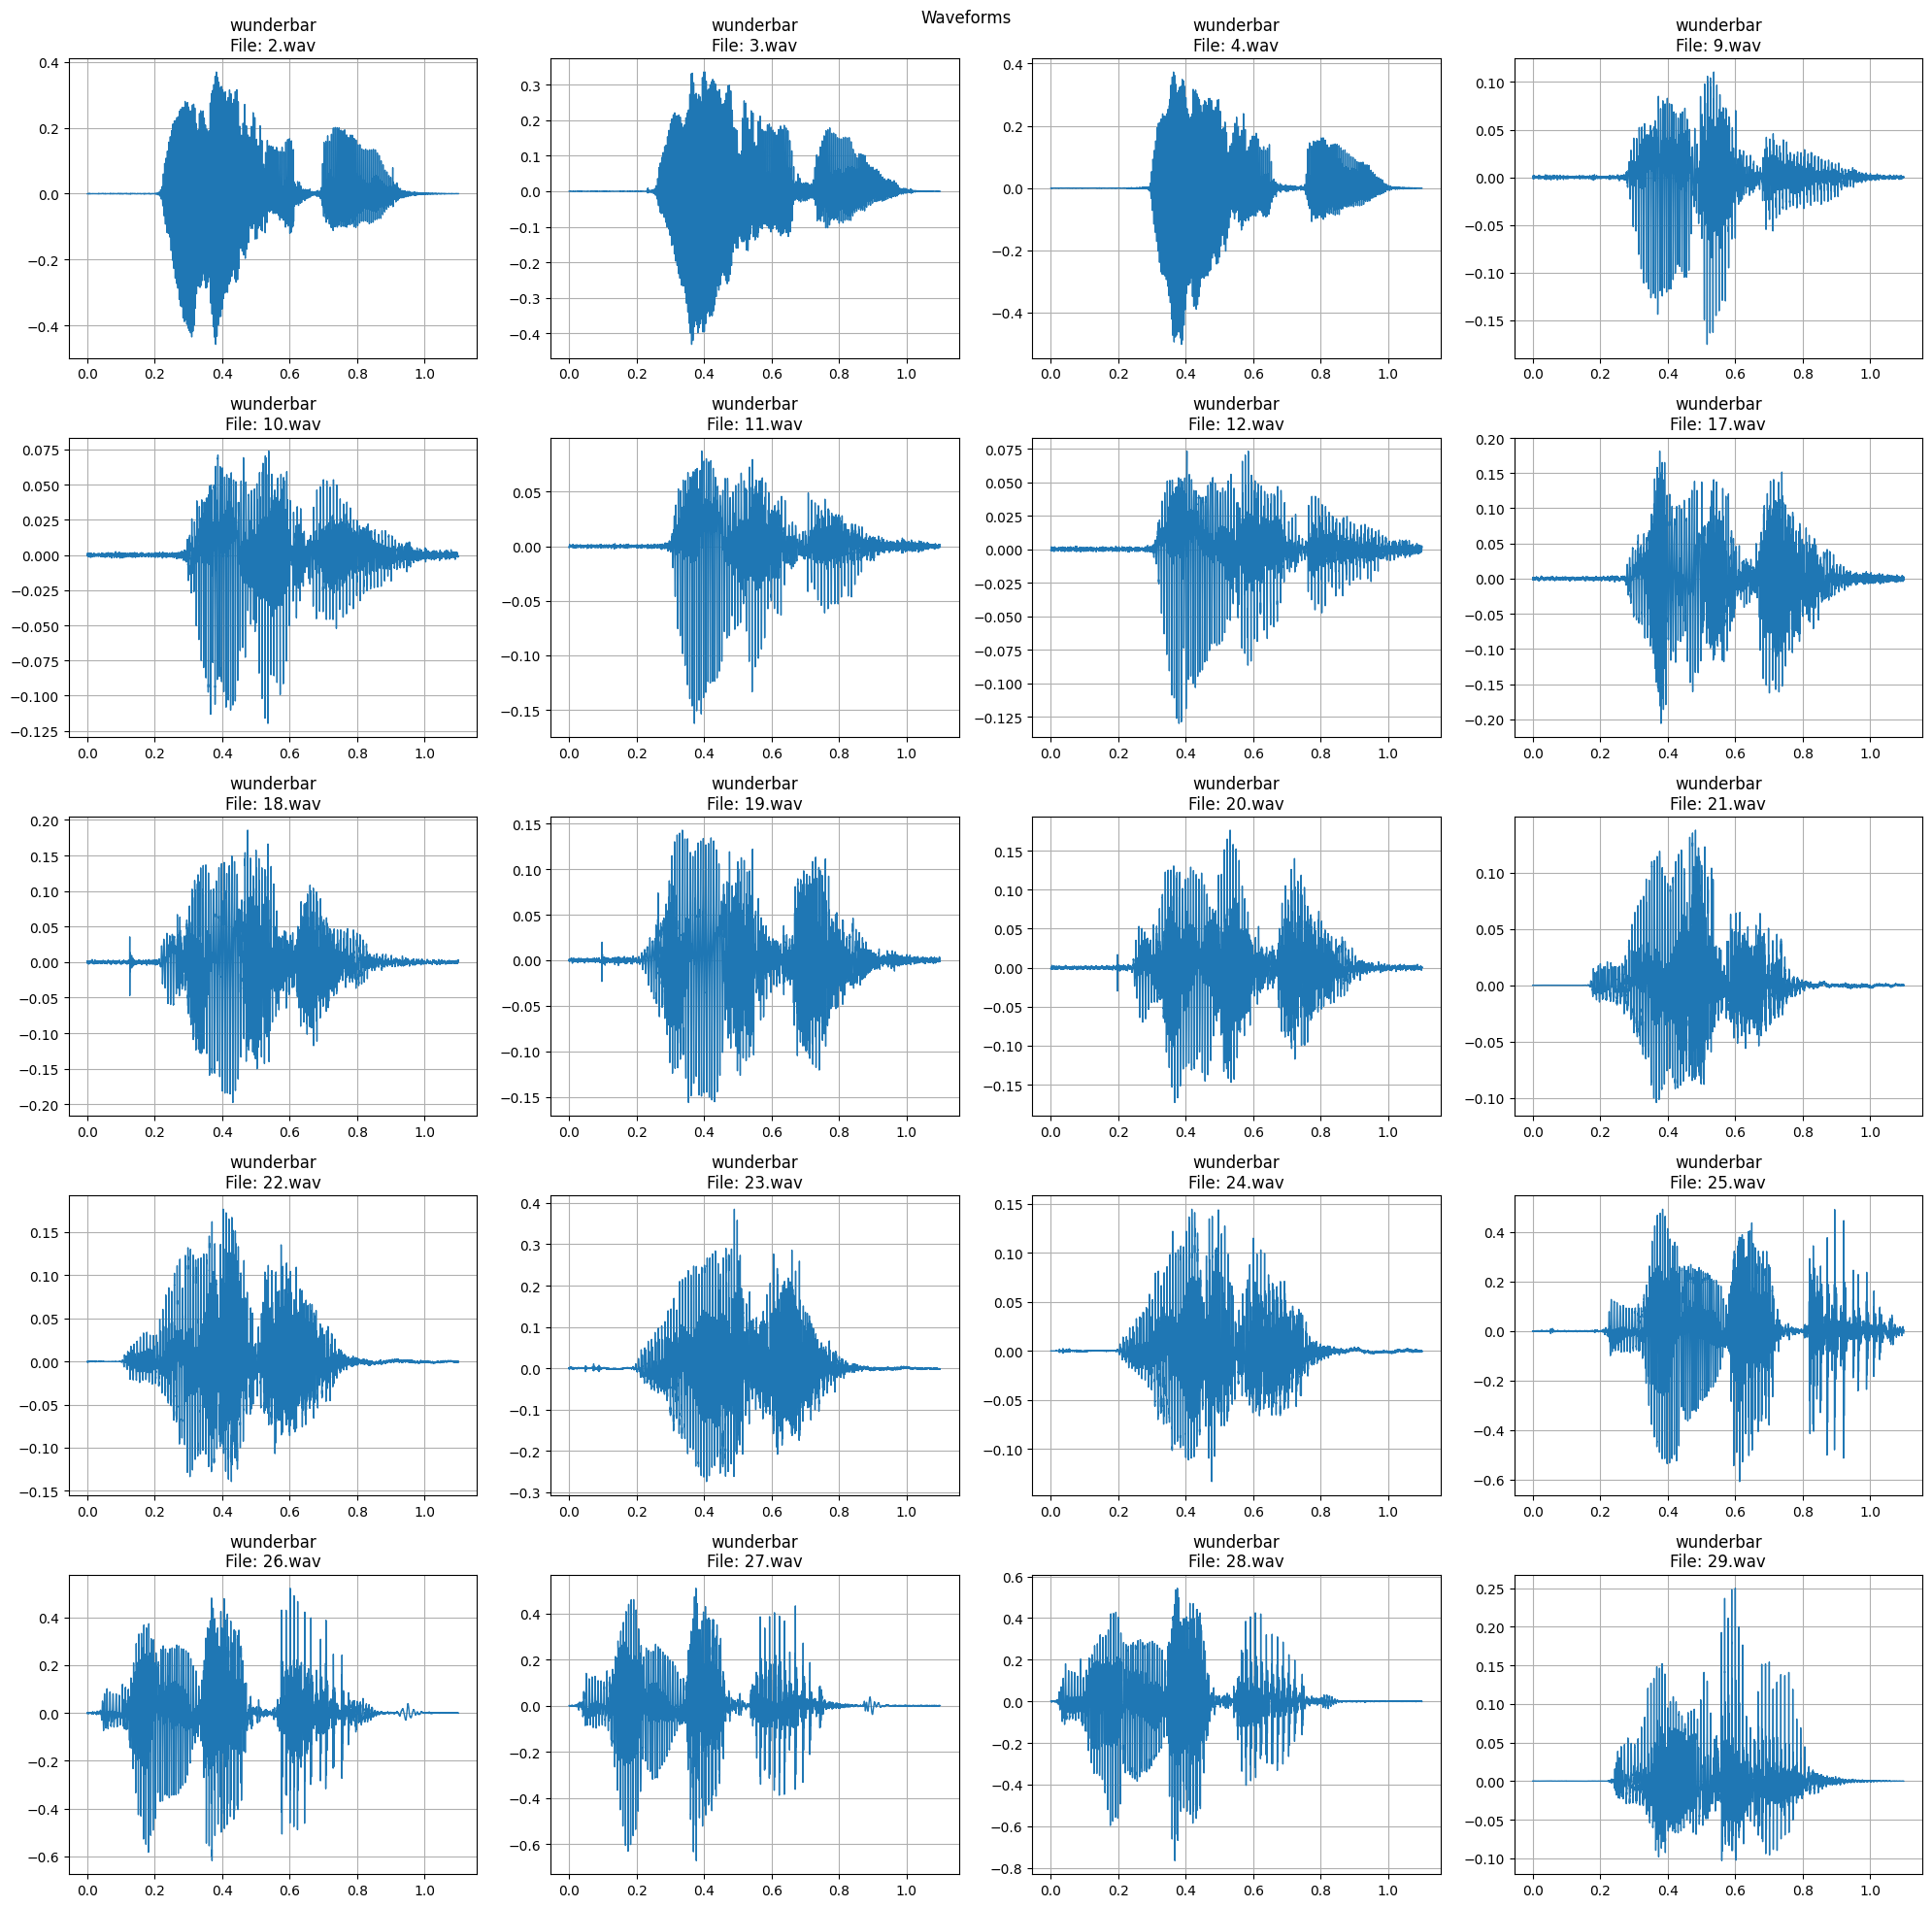

In [35]:
# NOT RANDOM
my_sample_class = "wunderbar"
start_pos = 1
space = 0

audios = {}
for i in range(0, 20):
    path = get_file_name_with_list_idx(class_to_idx_list_dict, my_sample_class, i + start_pos + space*i)
    filename = join_dir_name_and_file_name(WAV_DIR, path)
    # print(filename)
    waveform, sample_rate = torchaudio.load(filename)
    audios[i] = (filename, waveform, sample_rate)

plot_waveform_matrix(audios)

## 2.4 Now we want to compare samples from 2 different classes

In [36]:
# just for copying the key you need...
for annotated_class, files in class_to_idx_list_dict.items():
    print(f"{annotated_class}", end = "    ")

Brötchen    kann    Staubsauger    Spiegel    Alarm    Lüftung    Ofen    Haus    Heizung    Fernseher    Schraube    Licht    aus    nicht    warm    an    Leitung    offen    wunderbar    Radio    other    

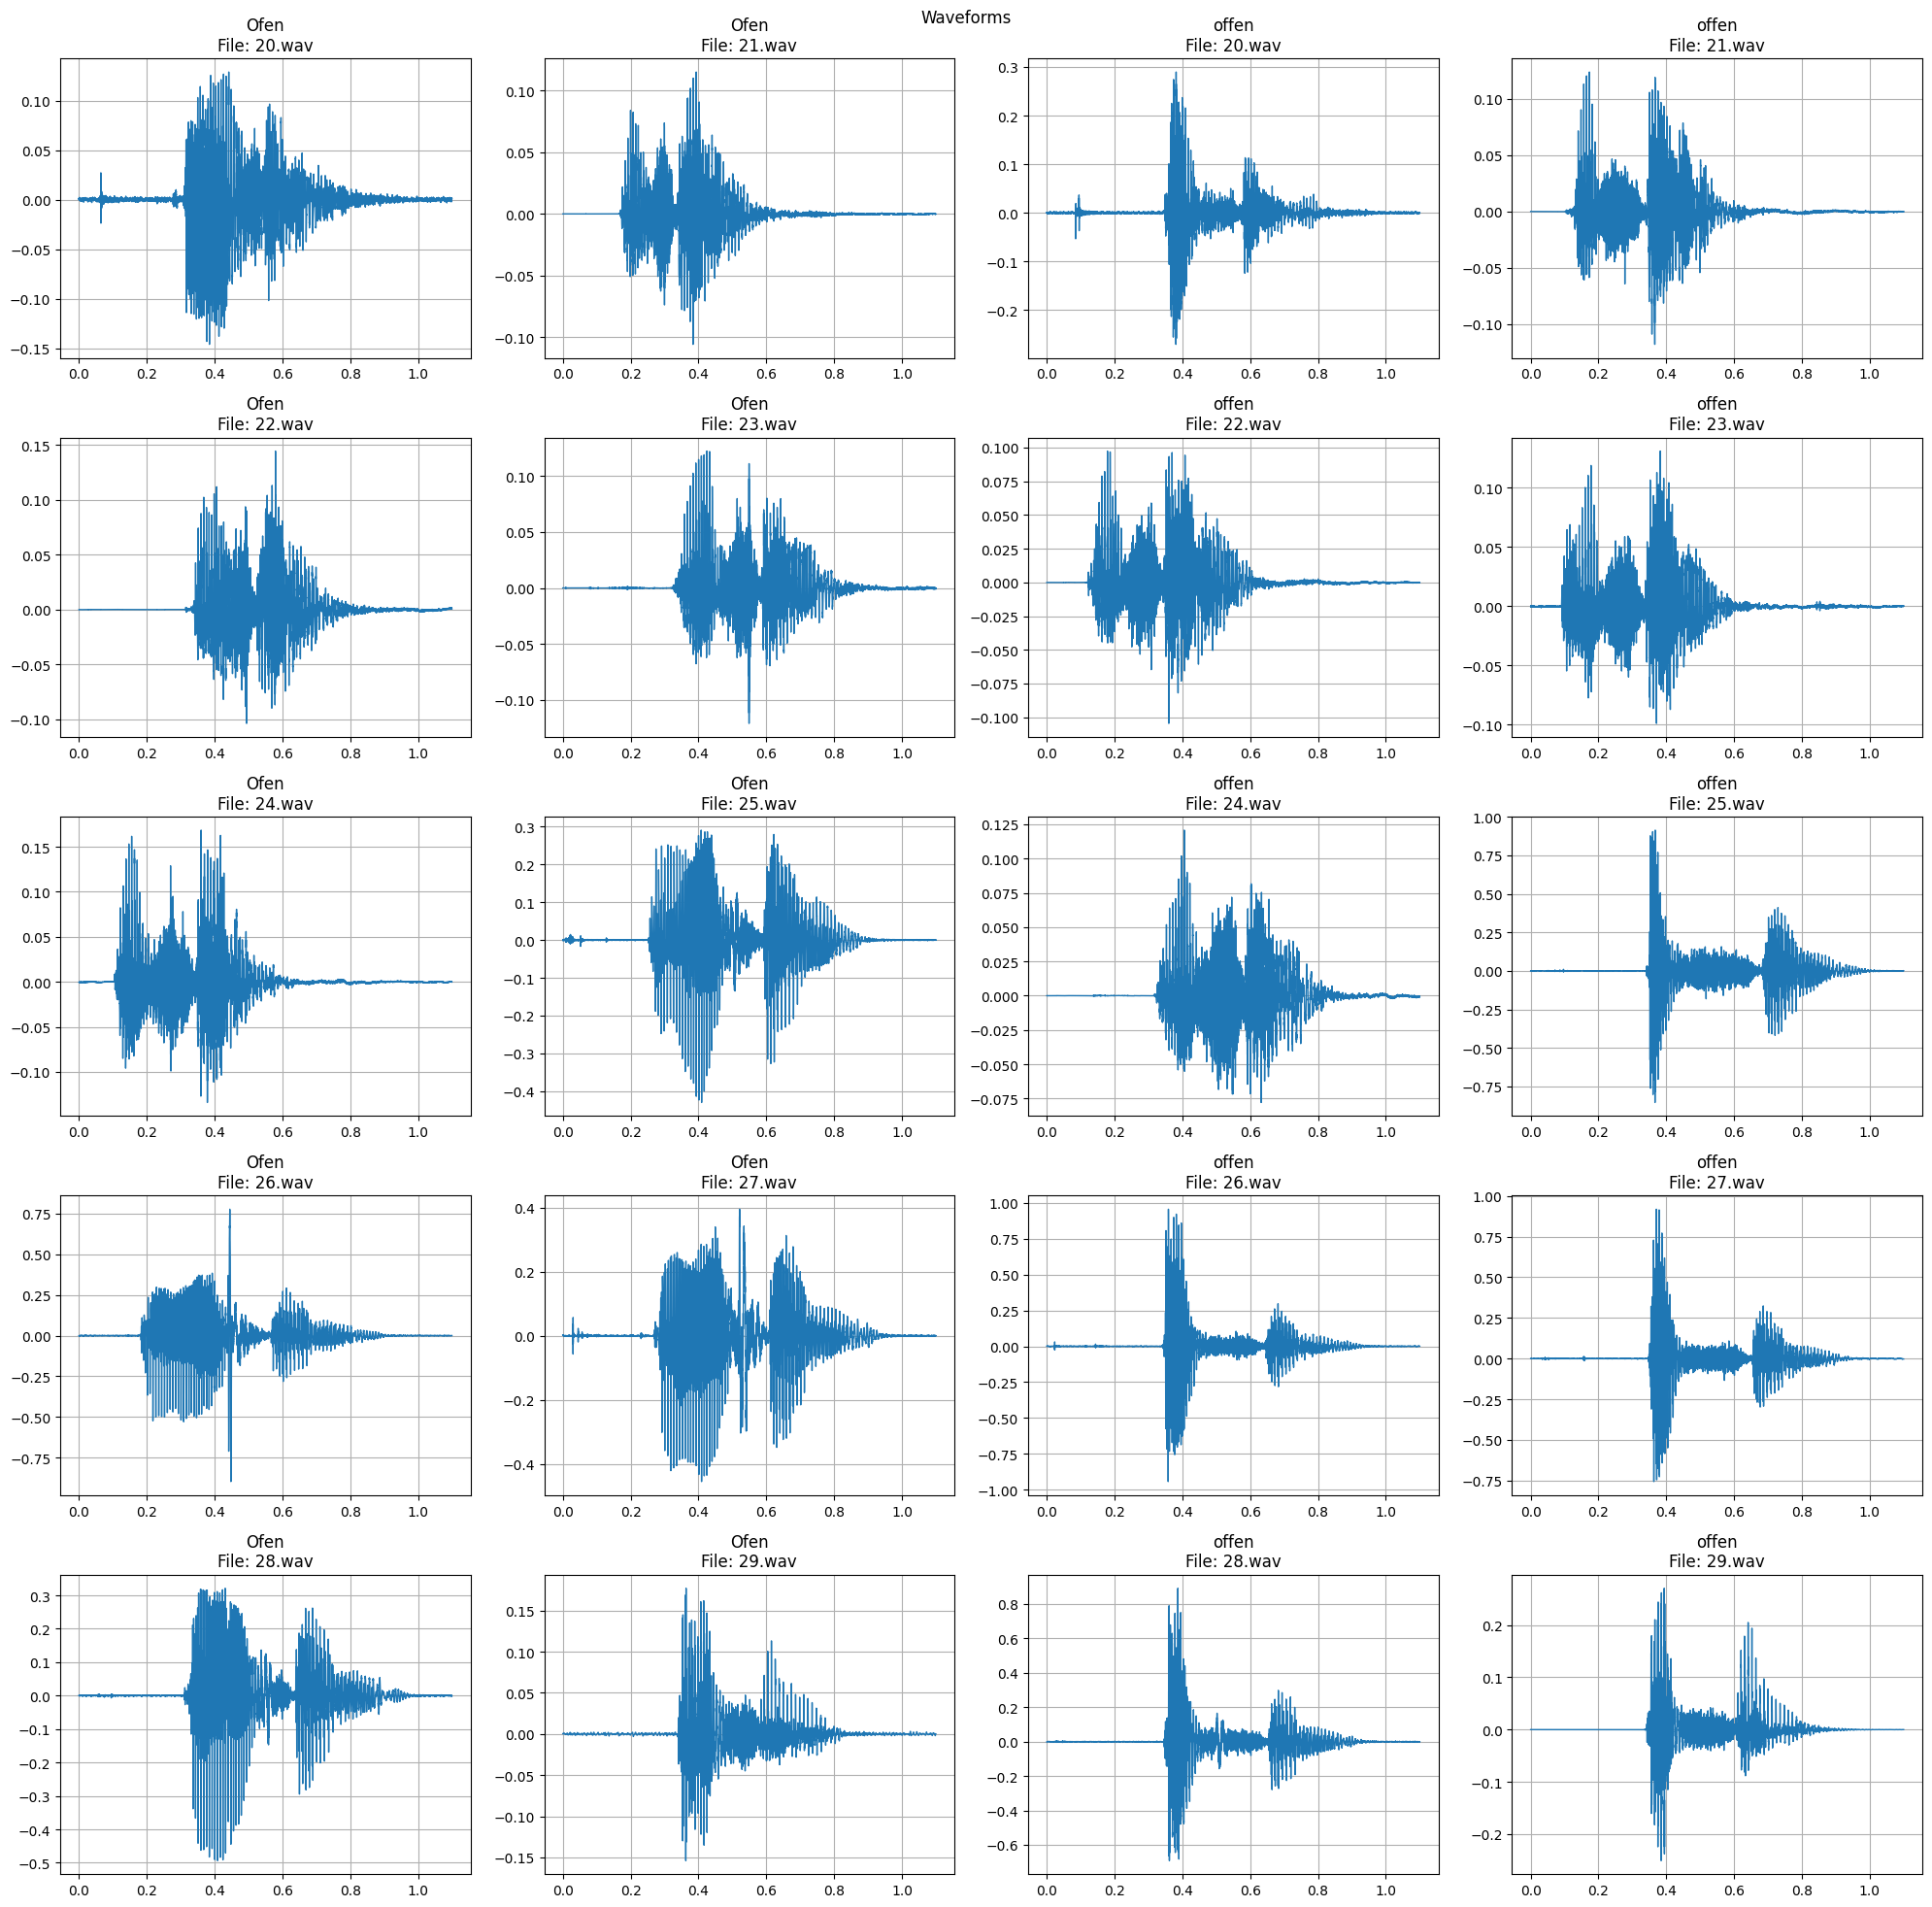

In [37]:
# NOT RANDOM
my_sample_class_1 = "Ofen"
my_sample_class_2 = "offen"
start_pos = 10

counter_1, counter_2 = 0, 0
audios = {}
for i in range(5):
    for j in range(4):
        if j <= 1:
            my_sample_class = my_sample_class_1
            counter_1 += 1
            counter = counter_1
        else:
            my_sample_class = my_sample_class_2
            counter_2 += 1
            counter = counter_2
        path = get_file_name_with_list_idx(class_to_idx_list_dict, my_sample_class, counter + start_pos + space*i)
        filename = join_dir_name_and_file_name(WAV_DIR, path)
    
        waveform, sample_rate = torchaudio.load(filename)
        audios[i*5 + j] = (filename, waveform, sample_rate)      
plot_waveform_matrix(audios)

In [38]:
# NOT RANDOM, you can choose and it stays the same
my_test_key = "offen"
my_test_sample = 9

# play audio file
audio_file = construct_wav_file_path(WAV_DIR, my_test_key, my_test_sample)
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

Files/MLPC24_speech_commands_raw_waveforms/offen/9.wav


# 3. Now lets check the extracted features of the audio dataset (which is the main task)

## 3.1 Plot 1 feature 

This is 1 feature (which we saw earlier...)

In [39]:
# just for copying the key you need...
for annotated_class, files in class_to_idx_list_dict.items():
    print(f"{annotated_class}", end = "    ")

Brötchen    kann    Staubsauger    Spiegel    Alarm    Lüftung    Ofen    Haus    Heizung    Fernseher    Schraube    Licht    aus    nicht    warm    an    Leitung    offen    wunderbar    Radio    other    

Files/MLPC24_speech_commands_raw_waveforms/Alarm/1.wav


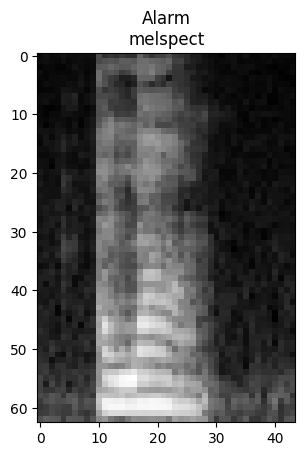

In [40]:
# plot a 2D image (here melspect)
my_test_key = "Alarm"
my_feature = "melspect"
my_test_sample = 1

filename = construct_wav_file_path(WAV_DIR, my_test_key, my_test_sample)
print(filename)
data = get_numpy_array_id_with_wavfile(DEVELOPMENT_FILE, filename, dataset_audio)

(start_idx, stop_idx), _ = get_feature_indices(feature_name_idx_dict, my_feature)

plt.title(f"{my_test_key}\n{my_feature}")
if get_size_of_feature(feature_name_idx_dict, my_feature) > 1:
    plt.imshow(np.flipud(data[1][start_idx:stop_idx,:]), cmap="gray")
else:
    plt.plot(data[1][start_idx])

Files/MLPC24_speech_commands_raw_waveforms/Alarm/1.wav


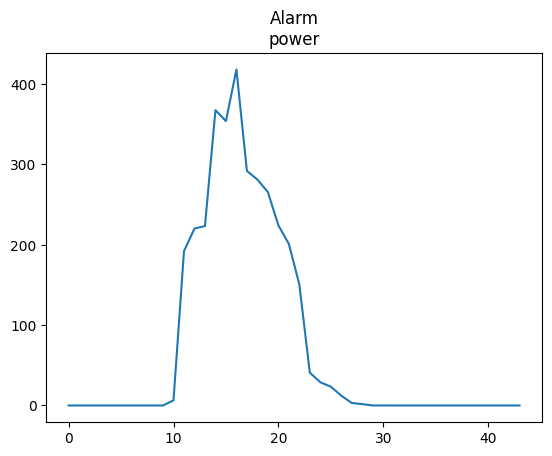

In [41]:
# plot a 2D image (here melspect)
my_test_key = "Alarm"
my_feature = "power"
my_test_sample = 1

filename = construct_wav_file_path(WAV_DIR, my_test_key, my_test_sample)
print(filename)
data = get_numpy_array_id_with_wavfile(DEVELOPMENT_FILE, filename, dataset_audio)

(start_idx, stop_idx), _ = get_feature_indices(feature_name_idx_dict, my_feature)

plt.title(f"{my_test_key}\n{my_feature}")
if get_size_of_feature(feature_name_idx_dict, my_feature) > 1:
    plt.imshow(np.flipud(data[1][start_idx:stop_idx,:]), cmap="gray")
else:
    plt.plot(data[1][start_idx])

## 3.2 Plot a feature matrix with all features in one matrix... :-)

In [42]:
# just for copying the key you need...
for annotated_class, files in class_to_idx_list_dict.items():
    print(f"{annotated_class}", end = "    ")

Brötchen    kann    Staubsauger    Spiegel    Alarm    Lüftung    Ofen    Haus    Heizung    Fernseher    Schraube    Licht    aus    nicht    warm    an    Leitung    offen    wunderbar    Radio    other    

In [43]:
desired_order_list = ["melspect", 
                      "mfcc",
                      "mfcc_d",
                      "mfcc_d2",
                      "energy",
                      "power",
                      "yin",
                      "zcr",
                      "bandwidth",
                      "centroid",
                      "flatness",
                      "flux",
                      "contrast"]
reordered_dict = {k: feature_name_idx_dict[k] for k in desired_order_list}

# Example usage:
print(reordered_dict)

{'melspect': (12, 75), 'mfcc': (76, 107), 'mfcc_d': (108, 139), 'mfcc_d2': (140, 171), 'energy': (9, 9), 'power': (172, 172), 'yin': (173, 173), 'zcr': (174, 174), 'bandwidth': (0, 0), 'centroid': (1, 1), 'flatness': (10, 10), 'flux': (11, 11), 'contrast': (2, 8)}


In [44]:
print(reordered_dict)

{'melspect': (12, 75), 'mfcc': (76, 107), 'mfcc_d': (108, 139), 'mfcc_d2': (140, 171), 'energy': (9, 9), 'power': (172, 172), 'yin': (173, 173), 'zcr': (174, 174), 'bandwidth': (0, 0), 'centroid': (1, 1), 'flatness': (10, 10), 'flux': (11, 11), 'contrast': (2, 8)}


In [45]:
def plot_feature_matrix(class_to_idx_list_dict, test_key, audios):

    _, data = audios
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    
    # Iterate over each feature in feature_name_idx_dict
    for i, (feature_name, feature_indices) in enumerate(class_to_idx_list_dict.items()):
        row = i // 4
        col = i % 4

        axes[row, col].set_title(f"{feature_name}")
        
        (start_idx, stop_idx), _ = get_feature_indices(feature_name_idx_dict, feature_name)
        
        if get_size_of_feature(feature_name_idx_dict, feature_name) > 1:
            axes[row, col].imshow(np.flipud(data[1][start_idx:stop_idx,:]), cmap="gray")
        else:
            axes[row, col].plot(data[1][start_idx])
        
        axes[row, col].grid(True)
            
    fig.suptitle(f"Audio Features \"{test_key}\"")
    plt.tight_layout()


Files/MLPC24_speech_commands_raw_waveforms/offen/1.wav


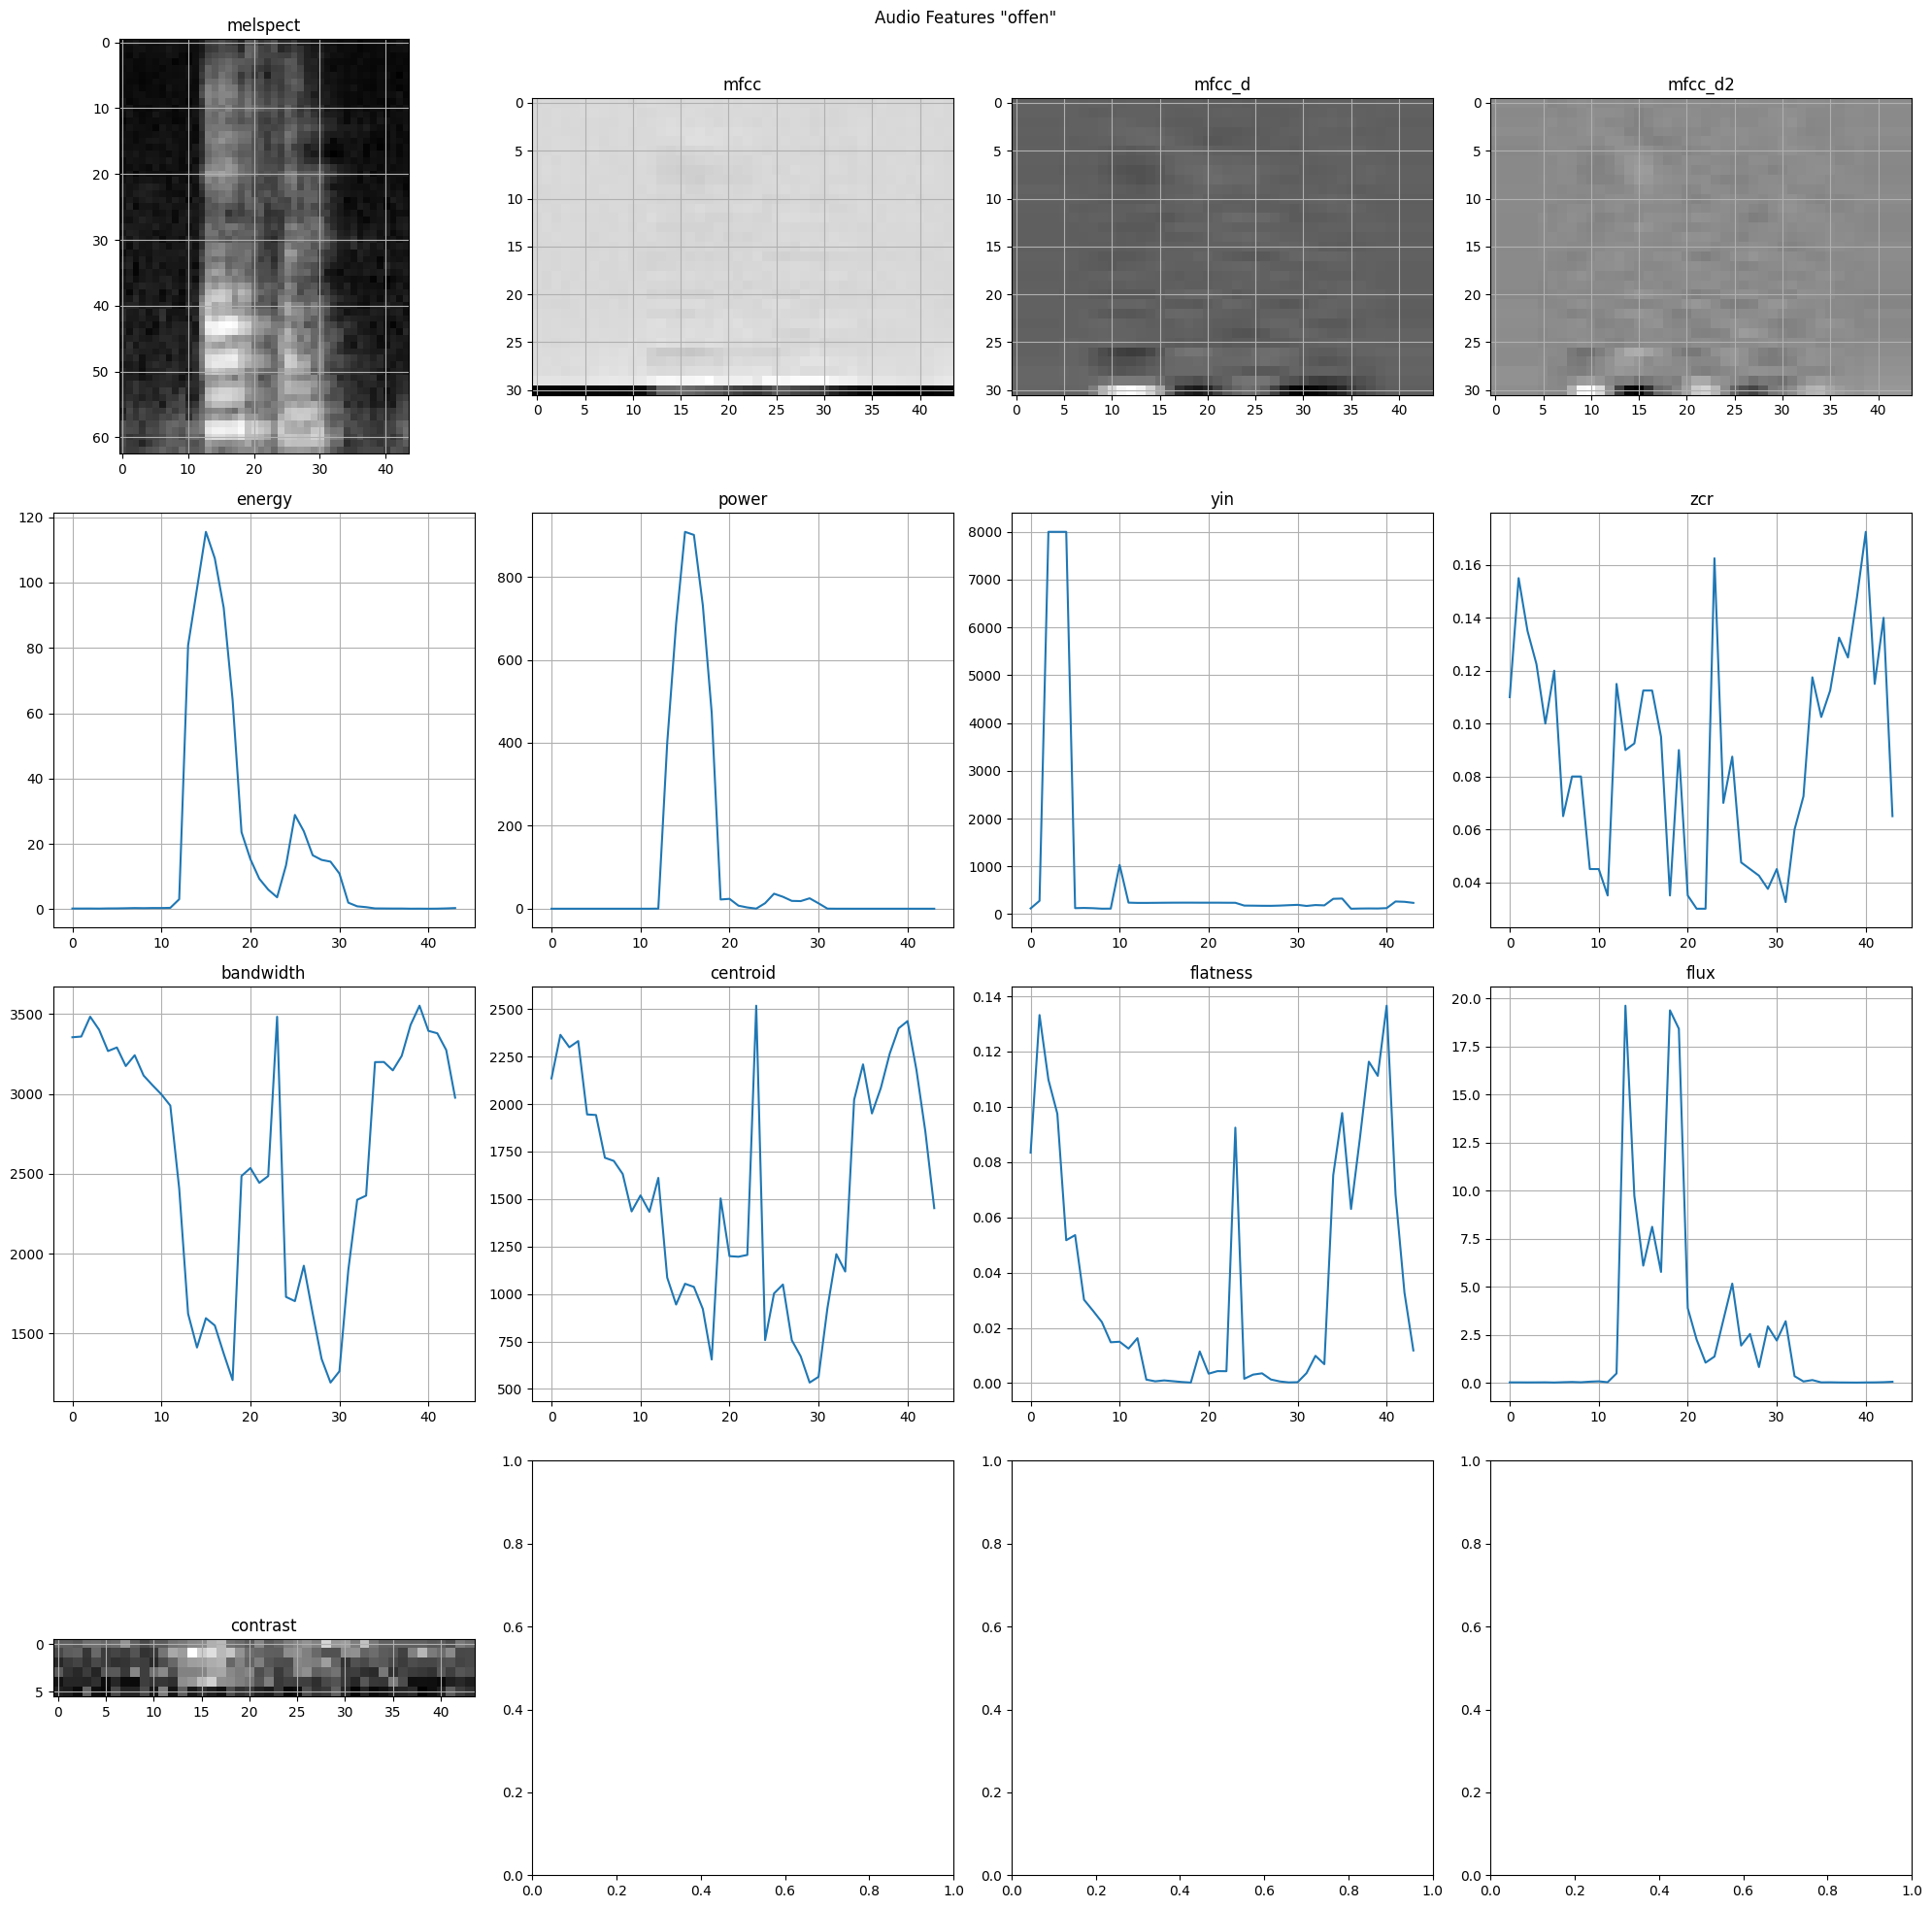

In [46]:
my_test_key = "offen"
my_test_sample = 1

filename = construct_wav_file_path(WAV_DIR, my_test_key, my_test_sample)
print(filename)
data = get_numpy_array_id_with_wavfile(DEVELOPMENT_FILE, filename, dataset_audio)
audios = (filename, data)

plot_feature_matrix(reordered_dict, my_test_key, audios)

## 3.3 Compare 1 feature with several samples in a matrix plot

In [47]:
def plot_sample_matrix(feature_name_idx_dict, test_key, feature_name, audios):

    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    
    # Iterate over each feature in feature_name_idx_dict
    for i in range(16):
        filename, data = audios[i]
        filename = extract_last_2_parts_of_filepath(filename)
        
        row = i // 4
        col = i % 4

        axes[row, col].set_title(f"{filename}")
        
        (start_idx, stop_idx), _ = get_feature_indices(feature_name_idx_dict, feature_name)
        
        if get_size_of_feature(feature_name_idx_dict, feature_name) > 1:
            axes[row, col].imshow(np.flipud(data[1][start_idx:stop_idx,:]), cmap="gray")
        else:
            axes[row, col].plot(data[1][start_idx])
        
        axes[row, col].grid(True)
            
    fig.suptitle(f"Audio Features '{feature_name}' + '{test_key}'")
    plt.tight_layout()

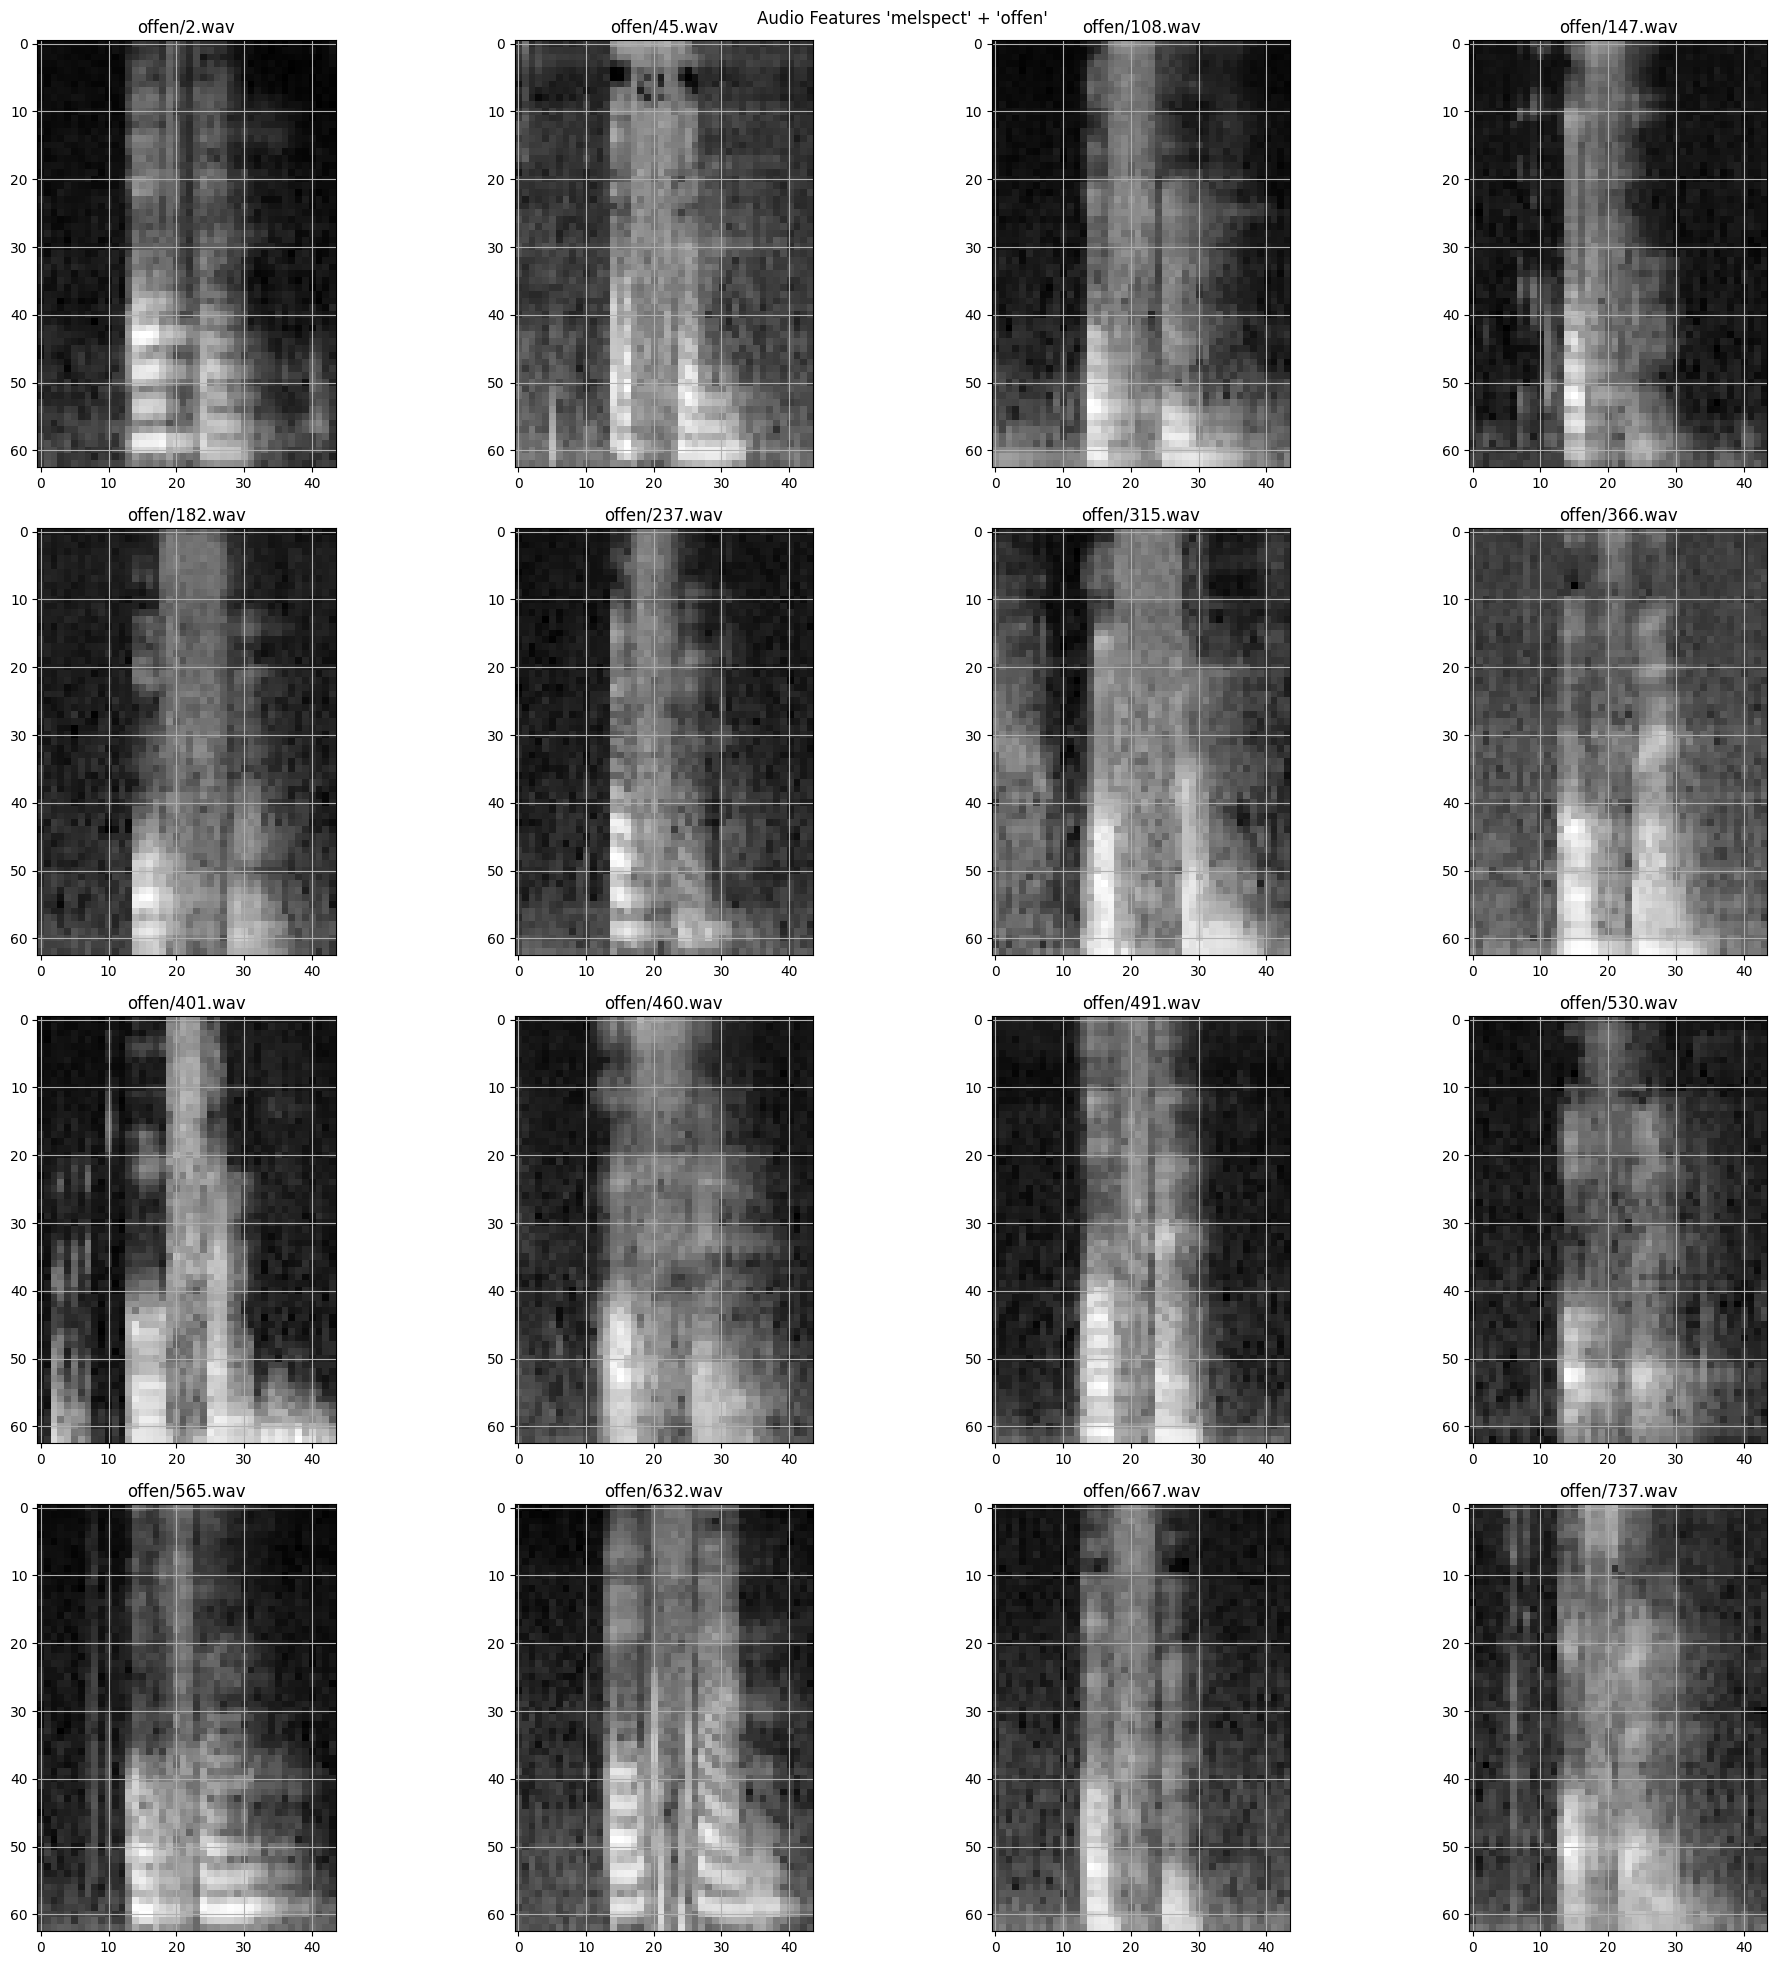

In [48]:
my_test_key = "offen"
my_feature = "melspect"
start_pos = 1
space = 30

audios = {}
for i in range(0, 16):
    path = get_file_name_with_list_idx(class_to_idx_list_dict, my_test_key, i + start_pos + space*i)
    filename = join_dir_name_and_file_name(WAV_DIR, path)
    data = get_numpy_array_id_with_wavfile(DEVELOPMENT_FILE, filename, dataset_audio)
    audios[i] = (filename, data)
    
plot_sample_matrix(reordered_dict, my_test_key, my_feature, audios)

## 3.5 Analyze the "other"

In [49]:
my_test_key = "other"
my_test_sample = 1

# play audio file
audio_file = annotated_classes_dict[my_test_key][my_test_sample]
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

NameError: name 'annotated_classes_dict' is not defined

In [ ]:
my_test_key = "other"
my_test_sample = 0

plot_feature_matrix(class_to_idx_list_dict, my_test_key, dataset_audio, my_test_sample)

# 4. Conclusion

Questions to ask:
* Which features seems useful?
* Which features are correlated?
* Which words have similar feature distribution?

In [ ]:
my_test_key = "Ofen"
my_test_sample = 0

plot_feature_matrix(class_to_idx_list_dict, my_test_key, dataset_audio, my_test_sample)

my_test_key = "wunderbar"
my_test_sample = 0

plot_feature_matrix(class_to_idx_list_dict, my_test_key, dataset_audio, my_test_sample)

my_test_key = "Licht"
my_test_sample = 0

plot_feature_matrix(class_to_idx_list_dict, my_test_key, dataset_audio, my_test_sample)

Starting with 2. question:
* By making a visual inspection of all features, mfcc, mfcc_d, mfcc_d2 seems very similar, therfore not much information gain here
* energy and power is also very similar, 1 feature can be removed
* bandwidth for speech / music recognition, no music: no bandwidth needed
* centroid for recognition of bright / dark sound (Ofen vs. Licht / wunderbar)
* flatness and flux is anticorrellated, flux can be removed
* zcr (+ flatness + yin) for noise

1. question:
All the other features seems useful, reduze size of melspec and maybe omit contrast 

3. question:
Check answer of 1. question